In [8]:
import numpy as np
import matplotlib.pyplot as plt

#人数(单位：万人)
population=[20.55,22.44,25.37,27.13,29.45,30.10,30.96,34.06,36.42,38.09,39.13,39.99,41.93,44.59,47.30,52.89,55.73,56.76,59.17,60.63]
#机动车数(单位：万辆)
vehicle=[0.6,0.75,0.85,0.9,1.05,1.35,1.45,1.6,1.7,1.85,2.15,2.2,2.25,2.35,2.5,2.6,2.7,2.85,2.95,3.1]
#公路面积(单位：万平方公里)
roadarea=[0.09,0.11,0.11,0.14,0.20,0.23,0.23,0.32,0.32,0.34,0.36,0.36,0.38,0.49,0.56,0.59,0.59,0.67,0.69,0.79]
#公路客运量(单位：万人)
passengertraffic=[5126,6217,7730,9145,10460,11387,12353,15750,18304,19836,21024,19490,20433,22598,25107,33442,36836,40548,42927,43462]
#公路货运量(单位：万吨)
freighttraffic=[1237,1379,1385,1399,1663,1714,1834,4322,8132,8936,11099,11203,10524,11115,13320,16762,18673,20724,20803,21804]

In [9]:
samplein = np.mat([population,vehicle,roadarea]) 
'''
[[ 20.55  22.44  25.37  27.13  29.45  30.1   30.96  34.06  36.42  38.09
   39.13  39.99  41.93  44.59  47.3   52.89  55.73  56.76  59.17  60.63]
 [  0.6    0.75   0.85   0.9    1.05   1.35   1.45   1.6    1.7    1.85
    2.15   2.2    2.25   2.35   2.5    2.6    2.7    2.85   2.95   3.1 ]
 [  0.09   0.11   0.11   0.14   0.2    0.23   0.23   0.32   0.32   0.34
    0.36   0.36   0.38   0.49   0.56   0.59   0.59   0.67   0.69   0.79]]
'''
sampleinminmax = np.array([samplein.min(axis=1).T.tolist()[0],samplein.max(axis=1).T.tolist()[0]]).transpose()#3*2，对应最大值最小值
'''
[[ 20.55  60.63]
 [  0.6    3.1 ]
 [  0.09   0.79]]
'''
sampleout = np.mat([passengertraffic,freighttraffic])#2*20
sampleoutminmax = np.array([sampleout.min(axis=1).T.tolist()[0],sampleout.max(axis=1).T.tolist()[0]]).transpose()#2*2，对应最大值最小值

#标准化
#3*20
sampleinnorm = (2*(np.array(samplein.T)-sampleinminmax.T[0])/(sampleinminmax.T[1]-sampleinminmax.T[0])-1).transpose()
'''
[[-1.         -0.90568862 -0.75948104 -0.67165669 -0.55588822 -0.52345309
  -0.48053892 -0.3258483  -0.20808383 -0.1247505  -0.07285429 -0.02994012
   0.06686627  0.1996008   0.33483034  0.61377246  0.75548902  0.80688623
   0.92714571  1.        ]
 [-1.         -0.88       -0.8        -0.76       -0.64       -0.4        -0.32
  -0.2        -0.12        0.          0.24        0.28        0.32        0.4
   0.52        0.6         0.68        0.8         0.88        1.        ]
 [-1.         -0.94285714 -0.94285714 -0.85714286 -0.68571429 -0.6        -0.6
  -0.34285714 -0.34285714 -0.28571429 -0.22857143 -0.22857143 -0.17142857
   0.14285714  0.34285714  0.42857143  0.42857143  0.65714286  0.71428571
   1.        ]]
'''
#2*20
sampleoutnorm = (2*(np.array(sampleout.T)-sampleoutminmax.T[0])/(sampleoutminmax.T[1]-sampleoutminmax.T[0])-1).transpose()

#给输出样本添加噪音
noise = 0.03*np.random.rand(sampleoutnorm.shape[0],sampleoutnorm.shape[1])
sampleoutnorm += noise

In [10]:
#超参数
maxepochs = 60000
learnrate = 0.035
errorfinal = 0.65*10**(-3)
samnum = 20
indim = 3
outdim = 2
hiddenunitnum = 8

# 网络设计
w1 = 0.5*np.random.rand(hiddenunitnum,indim)-0.1
b1 = 0.5*np.random.rand(hiddenunitnum,1)-0.1
w2 = 0.5*np.random.rand(outdim,hiddenunitnum)-0.1
b2 = 0.5*np.random.rand(outdim,1)-0.1

def logsig(x):
    return 1/(1+np.exp(-x))

errhistory = []
# BP算法遍历
for i in range(maxepochs):
    #隐藏层输出
    hiddenout = logsig((np.dot(w1,sampleinnorm).transpose()+b1.transpose())).transpose()
    # 输出层输出
    networkout = (np.dot(w2,hiddenout).transpose()+b2.transpose()).transpose()
    # 错误
    err = sampleoutnorm - networkout
    sse = sum(sum(err**2))

    errhistory.append(sse)
    if sse < errorfinal:
        break

    delta2 = err

    delta1 = np.dot(w2.transpose(),delta2)*hiddenout*(1-hiddenout)

    dw2 = np.dot(delta2,hiddenout.transpose())
    db2 = np.dot(delta2,np.ones((samnum,1)))

    dw1 = np.dot(delta1,sampleinnorm.transpose())
    db1 = np.dot(delta1,np.ones((samnum,1)))

    w2 += learnrate*dw2
    b2 += learnrate*db2

    w1 += learnrate*dw1
    b1 += learnrate*db1

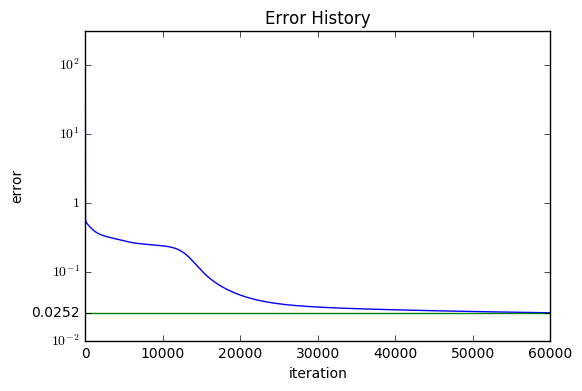

In [11]:
# 误差曲线图
errhistory10 = np.log10(errhistory)
minerr = min(errhistory10)
plt.plot(errhistory10)
plt.plot(range(0,i+1000,1000),[minerr]*len(range(0,i+1000,1000)))

ax=plt.gca()
ax.set_yticks([-2,-1,0,1,2,minerr])
ax.set_yticklabels([u'$10^{-2}$',u'$10^{-1}$',u'$1$',u'$10^{1}$',u'$10^{2}$',str(('%.4f'%np.power(10,minerr)))])
ax.set_xlabel('iteration')
ax.set_ylabel('error')
ax.set_title('Error History')
#plt.savefig('errorhistory.png',dpi=700)
plt.show()

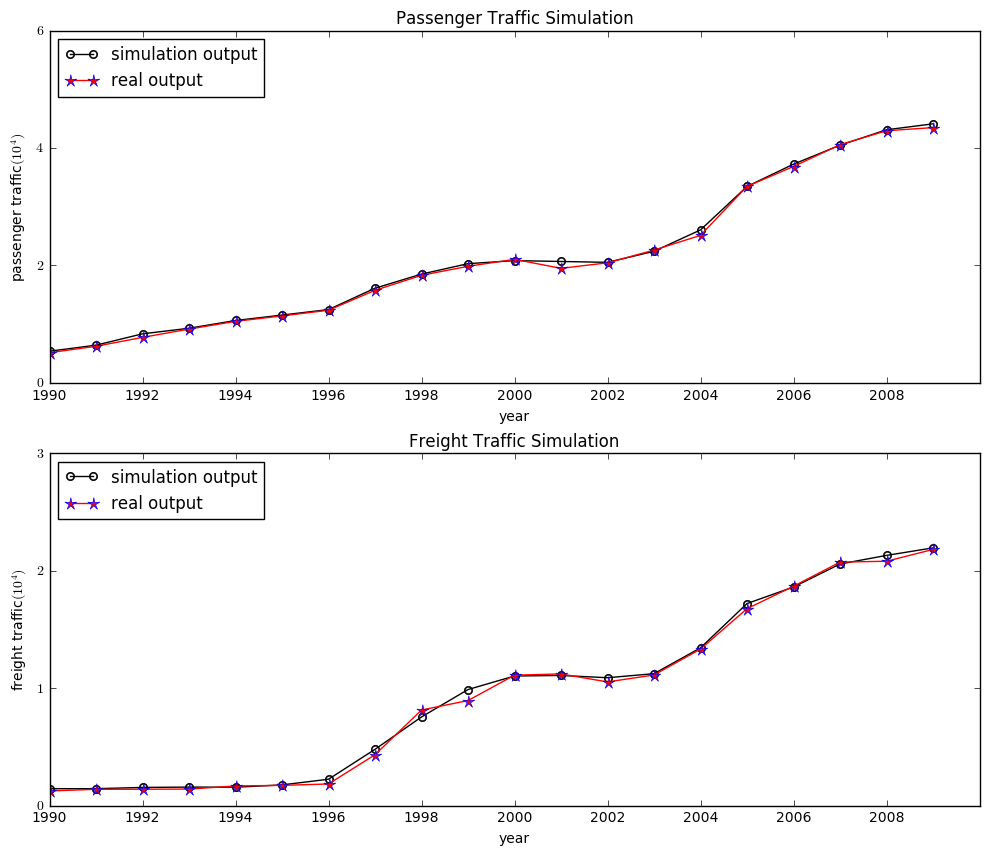

In [12]:
# 仿真输出和实际输出对比图
hiddenout = logsig((np.dot(w1,sampleinnorm).transpose()+b1.transpose())).transpose()
networkout = (np.dot(w2,hiddenout).transpose()+b2.transpose()).transpose()
diff = sampleoutminmax[:,1]-sampleoutminmax[:,0]
networkout2 = (networkout+1)/2
networkout2[0] = networkout2[0]*diff[0]+sampleoutminmax[0][0]
networkout2[1] = networkout2[1]*diff[1]+sampleoutminmax[1][0]

sampleout = np.array(sampleout)

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,10))
line1, =axes[0].plot(networkout2[0],'k',marker = u'$\circ$')
line2, = axes[0].plot(sampleout[0],'r',markeredgecolor='b',marker = u'$\star$',markersize=9)

axes[0].legend((line1,line2),('simulation output','real output'),loc = 'upper left')

yticks = [0,20000,40000,60000]
ytickslabel = [u'$0$',u'$2$',u'$4$',u'$6$']
axes[0].set_yticks(yticks)
axes[0].set_yticklabels(ytickslabel)
axes[0].set_ylabel(u'passenger traffic$(10^4)$')

xticks = range(0,20,2)
xtickslabel = range(1990,2010,2)
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xtickslabel)
axes[0].set_xlabel(u'year')
axes[0].set_title('Passenger Traffic Simulation')

line3, = axes[1].plot(networkout2[1],'k',marker = u'$\circ$')
line4, = axes[1].plot(sampleout[1],'r',markeredgecolor='b',marker = u'$\star$',markersize=9)
axes[1].legend((line3,line4),('simulation output','real output'),loc = 'upper left')
yticks = [0,10000,20000,30000]
ytickslabel = [u'$0$',u'$1$',u'$2$',u'$3$']
axes[1].set_yticks(yticks)
axes[1].set_yticklabels(ytickslabel)
axes[1].set_ylabel(u'freight traffic$(10^4)$')

xticks = range(0,20,2)
xtickslabel = range(1990,2010,2)
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xtickslabel)
axes[1].set_xlabel(u'year')
axes[1].set_title('Freight Traffic Simulation')

#fig.savefig('simulation.png',dpi=500,bbox_inches='tight')
plt.show()